In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('fraud_analysis_data\Train_IP_data.csv')
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Number of rows: " + str(df.shape[0]))
print("Number of columns: " + str(df.shape[1]))

Number of rows: 40474
Number of columns: 30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  object        
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  object

In [10]:
df['OperatingPhysician'].fillna('None', inplace=True)

In [11]:
df['OtherPhysician'].fillna('None',inplace=True)

In [12]:
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [13]:
null_columns = df.isnull().sum()
columns_with_null = null_columns[null_columns > 0]
columns_with_null

AttendingPhysician       112
DeductibleAmtPaid        899
ClmDiagnosisCode_2       226
ClmDiagnosisCode_3       676
ClmDiagnosisCode_4      1534
ClmDiagnosisCode_5      2894
ClmDiagnosisCode_6      4838
ClmDiagnosisCode_7      7258
ClmDiagnosisCode_8      9942
ClmDiagnosisCode_9     13497
ClmDiagnosisCode_10    36547
ClmProcedureCode_1     17326
ClmProcedureCode_2     35020
ClmProcedureCode_3     39509
ClmProcedureCode_4     40358
ClmProcedureCode_5     40465
ClmProcedureCode_6     40474
dtype: int64

In [14]:
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'], format = '%Y-%m-%d')
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'], format = '%Y-%m-%d')


In [15]:
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [16]:
df['ClaimDurationInDays'] = ((df['ClaimEndDt'] - df['ClaimStartDt']).dt.days).astype('int64')

In [17]:
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimDurationInDays
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17


In [18]:
df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'], format = '%Y-%m-%d')
df['DischargeDt'] = pd.to_datetime(df['DischargeDt'], format = '%Y-%m-%d')
df['AdmissionDurationInDays'] = ((df['DischargeDt'] - df['AdmissionDt']).dt.days).astype('int64')

In [19]:
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimDurationInDays,AdmissionDurationInDays
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,17


In [20]:
df = df.drop(columns = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt'])

In [21]:
df.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimDurationInDays,AdmissionDurationInDays
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,17


In [22]:
df.drop(columns = ['ClmProcedureCode_4','ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace= True)

In [23]:
df.shape

(40474, 25)

In [24]:
df.drop(columns = ['ClmProcedureCode_3'], axis=1, inplace= True)

In [25]:
df.shape

(40474, 24)

In [26]:
df['DeductibleAmtPaid'].fillna(0, inplace = True)

In [27]:
df.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClaimDurationInDays,AdmissionDurationInDays
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,...,2768,71590,2724,19889,5849,NaN,NaN,NaN,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,...,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,...,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,...,V1041,4254,25062,40390,4019,NaN,331.0,NaN,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,...,42732,486,5119,29620,20300,NaN,3893.0,NaN,17,17


In [28]:
print('Unique values in the DeductibleAmtPaid Column:', df.DeductibleAmtPaid.unique())

Unique values in the DeductibleAmtPaid Column: [1068.    0.]


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BeneID                   40474 non-null  object 
 1   ClaimID                  40474 non-null  object 
 2   Provider                 40474 non-null  object 
 3   InscClaimAmtReimbursed   40474 non-null  int64  
 4   AttendingPhysician       40362 non-null  object 
 5   OperatingPhysician       40474 non-null  object 
 6   OtherPhysician           40474 non-null  object 
 7   ClmAdmitDiagnosisCode    40474 non-null  object 
 8   DeductibleAmtPaid        40474 non-null  float64
 9   DiagnosisGroupCode       40474 non-null  object 
 10  ClmDiagnosisCode_1       40474 non-null  object 
 11  ClmDiagnosisCode_2       40248 non-null  object 
 12  ClmDiagnosisCode_3       39798 non-null  object 
 13  ClmDiagnosisCode_4       38940 non-null  object 
 14  ClmDiagnosisCode_5    

In [30]:
df.apply(lambda x: x.fillna(x.value_counts().index[0], inplace = True))

BeneID                     None
ClaimID                    None
Provider                   None
InscClaimAmtReimbursed     None
AttendingPhysician         None
OperatingPhysician         None
OtherPhysician             None
ClmAdmitDiagnosisCode      None
DeductibleAmtPaid          None
DiagnosisGroupCode         None
ClmDiagnosisCode_1         None
ClmDiagnosisCode_2         None
ClmDiagnosisCode_3         None
ClmDiagnosisCode_4         None
ClmDiagnosisCode_5         None
ClmDiagnosisCode_6         None
ClmDiagnosisCode_7         None
ClmDiagnosisCode_8         None
ClmDiagnosisCode_9         None
ClmDiagnosisCode_10        None
ClmProcedureCode_1         None
ClmProcedureCode_2         None
ClaimDurationInDays        None
AdmissionDurationInDays    None
dtype: object

In [31]:
df.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClaimDurationInDays,AdmissionDurationInDays
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,...,2768,71590,2724,19889,5849,4019,9904.0,4019.0,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,...,4019,4019,4019,4019,4019,4019,7092.0,4019.0,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,...,V1581,32723,4019,4019,4019,4019,9904.0,4019.0,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,...,V1041,4254,25062,40390,4019,4019,331.0,4019.0,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,...,42732,486,5119,29620,20300,4019,3893.0,4019.0,17,17


In [33]:
df

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClaimDurationInDays,AdmissionDurationInDays
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,...,2768,71590,2724,19889,5849,4019,9904.0,4019.0,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,...,4019,4019,4019,4019,4019,4019,7092.0,4019.0,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,...,V1581,32723,4019,4019,4019,4019,9904.0,4019.0,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,...,V1041,4254,25062,40390,4019,4019,331.0,4019.0,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,...,42732,486,5119,29620,20300,4019,3893.0,4019.0,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,PRV53671,7000,PHY345332,PHY319565,None,2859,1068.0,812,...,V1005,5173,79092,70704,2869,4148,9904.0,4019.0,4,4
40470,BENE159175,CLM74504,PRV54981,4000,PHY342806,PHY365497,None,79902,1068.0,228,...,4241,V1042,49122,4254,5990,4019,8605.0,4019.0,3,3
40471,BENE159177,CLM76485,PRV56588,3000,PHY423220,PHY332752,None,78605,1068.0,302,...,40390,4111,71534,71590,V4502,4019,9390.0,4019.0,4,4
40472,BENE159177,CLM79949,PRV56575,5000,PHY353156,None,None,7802,1068.0,309,...,V1254,42822,4263,0414,41400,4019,9904.0,4019.0,1,1


In [36]:
convert_to_CSV = df.to_csv('IP_data_day2.csv', sep=',', index=False, encoding='utf-8')
convert_to_CSV

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BeneID                   40474 non-null  object 
 1   ClaimID                  40474 non-null  object 
 2   Provider                 40474 non-null  object 
 3   InscClaimAmtReimbursed   40474 non-null  int64  
 4   AttendingPhysician       40474 non-null  object 
 5   OperatingPhysician       40474 non-null  object 
 6   OtherPhysician           40474 non-null  object 
 7   ClmAdmitDiagnosisCode    40474 non-null  object 
 8   DeductibleAmtPaid        40474 non-null  float64
 9   DiagnosisGroupCode       40474 non-null  object 
 10  ClmDiagnosisCode_1       40474 non-null  object 
 11  ClmDiagnosisCode_2       40474 non-null  object 
 12  ClmDiagnosisCode_3       40474 non-null  object 
 13  ClmDiagnosisCode_4       40474 non-null  object 
 14  ClmDiagnosisCode_5    

In [48]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## InscClaimAmtReimbursed

<Figure size 1000x700 with 0 Axes>

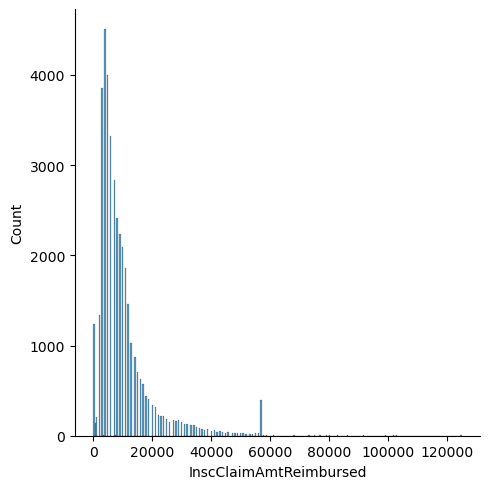

In [119]:
plt.figure(figsize =(10, 7))
sns.displot(df.InscClaimAmtReimbursed)
plt.show()

## Operating Physician

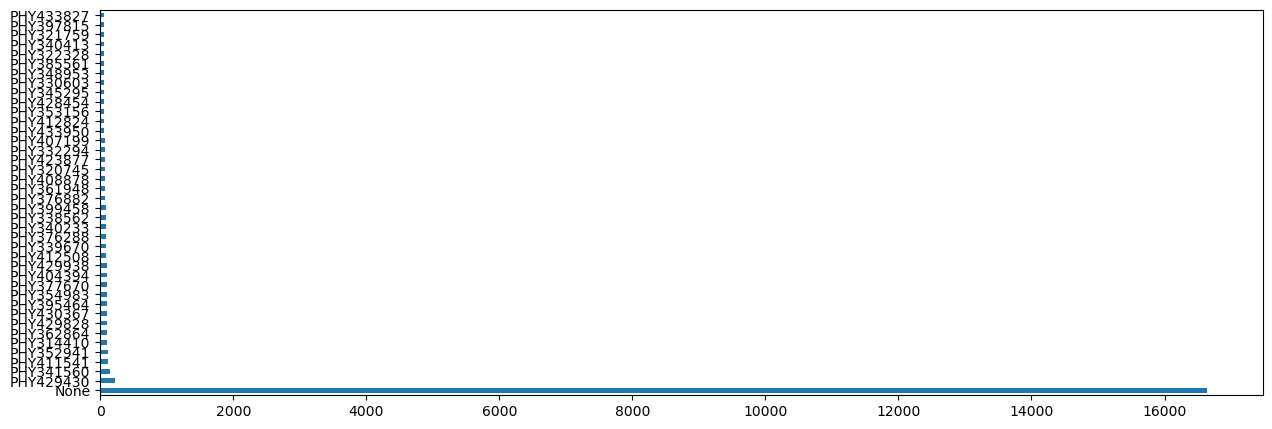

In [107]:
plt.figure(figsize=(15, 5))
values_count = df.OperatingPhysician.value_counts()
show_head_of_values_count = values_count.head(40)
show_head_of_values_count.plot( x=df.OperatingPhysician , kind = 'barh')
plt.show()

In [78]:
IP_procedure_df = pd.DataFrame(columns = ['ProcedureCode'])
IP_procedure_df['ProcedureCode'] = pd.concat([
   df["ClmProcedureCode_1"], 
   df["ClmProcedureCode_2"]
], axis=0, sort=True).dropna()
IP_procedure_df.shape

(80948, 1)

In [80]:
IP_DiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])
IP_DiagnosisCode_df['DiagnosisCode'] = pd.concat([
   df["ClmDiagnosisCode_1"], 
   df["ClmDiagnosisCode_2"],
   df["ClmDiagnosisCode_3"],
   df["ClmDiagnosisCode_4"],
   df["ClmDiagnosisCode_5"],
   df["ClmDiagnosisCode_6"],
   df["ClmDiagnosisCode_7"],
   df["ClmDiagnosisCode_8"],
   df["ClmDiagnosisCode_9"],
   df["ClmDiagnosisCode_10"],
], axis=0, sort=True).dropna()
IP_DiagnosisCode_df.shape

(404740, 1)

In [85]:
IP_DiagnosisCode_df.head()

,DiagnosisCode
0,1970
1,6186
2,29623
3,43491
4,042


In [102]:
def analyse_cat_columns(
        dataset,
        col_to_analyse='', 
        prefix = '',
        title = 'Distribution in percentage ',
        top_val = 15, 
        y_lim = np.arange(0,8),
        color ='blue'):
    
    val_counts_ = dataset[col_to_analyse].value_counts()
    
    #store counts in count columm and values in a new column
    val_counts_df = val_counts_.to_frame()
    
    val_counts_df.columns = ['count'] 
    val_counts_df[col_to_analyse] = val_counts_df.index
    
    val_counts_df[col_to_analyse] = prefix + val_counts_df[col_to_analyse].astype(str)
    val_counts_df['Percentage'] = (val_counts_df['count'] / sum(val_counts_df['count']))*100
    
    val_counts_df = val_counts_df.head(top_val)
    
    val_counts_df.plot(
        x =col_to_analyse, 
        y='Percentage', 
        kind='barh', 
        color = color, 
        title=title, 
        figsize=(15,5),
        yticks = y_lim,
        grid = True
        )
    plt.show()

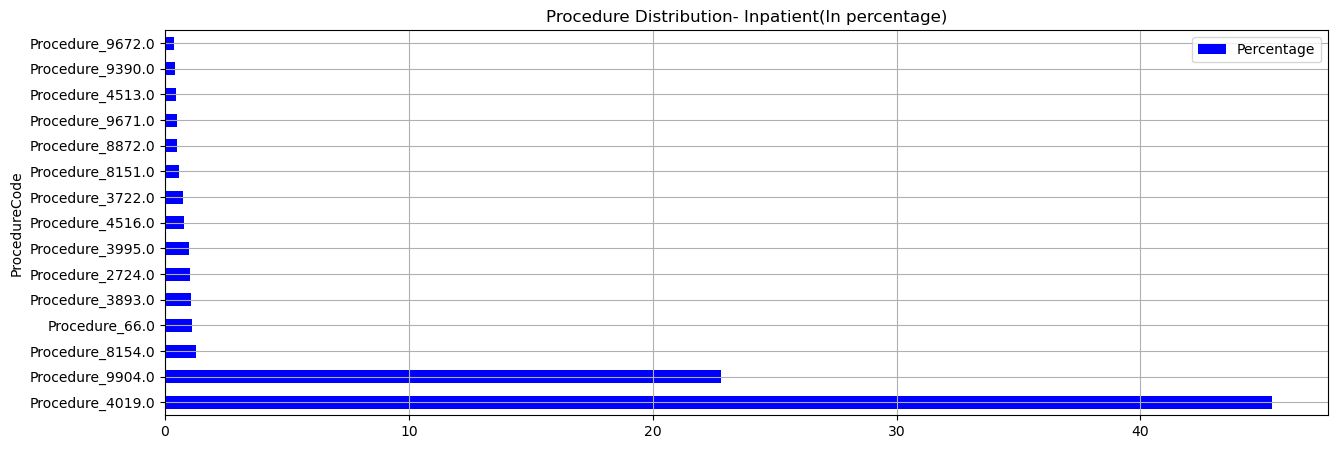

In [103]:
analyse_cat_columns(
    IP_procedure_df,
    col_to_analyse='ProcedureCode' , 
    prefix = 'Procedure_',
    title = 'Procedure Distribution- Inpatient(In percentage)',
    top_val = 15
    )

* more the 40% of the procedures are done for the Procedure_4019
* Procedure_9904 and _4019 are the two procedures which are mostly done

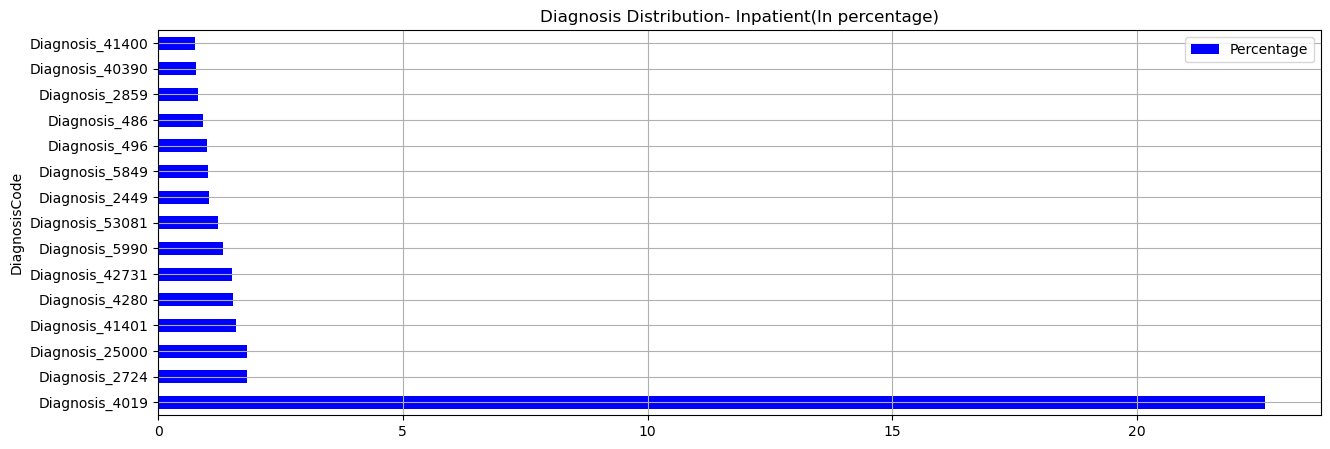

In [105]:
analyse_cat_columns(
    IP_DiagnosisCode_df,
    col_to_analyse='DiagnosisCode', 
    prefix = 'Diagnosis_',
    title = 'Diagnosis Distribution- Inpatient(In percentage)',
    top_val = 15)

* Diagnosis code 4019 is the most common Diagnosis a patinet undergo.
* Almost 20% patients have undergone Diagnosis code 4019.
* Diagnosis_41401, _25000, _2724, and _4019 are the highest among the IP data

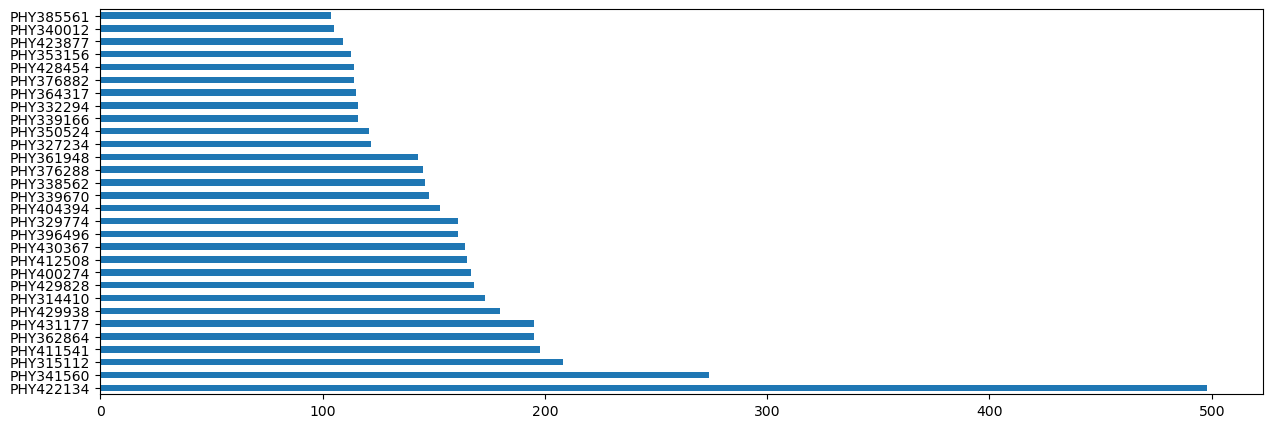

In [110]:
plt.figure(figsize=(15, 5))
df.AttendingPhysician.value_counts().head(30).plot( x=df.AttendingPhysician , kind = 'barh')
plt.show()

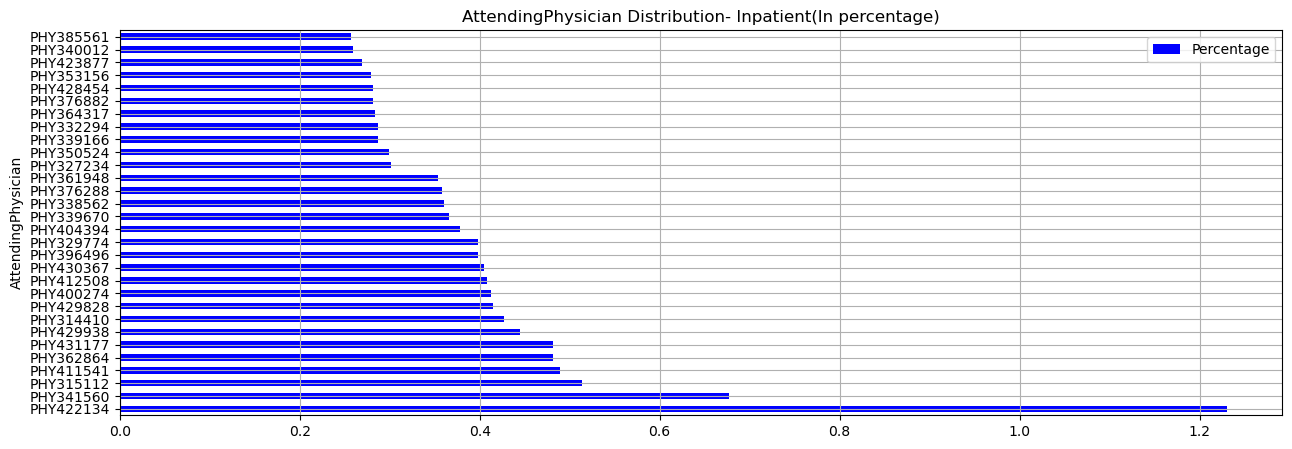

In [111]:
analyse_cat_columns(
    df,
    col_to_analyse='AttendingPhysician' , 
    prefix = '',
    y_lim = np.arange(0,1,0.1),
    title = 'AttendingPhysician Distribution- Inpatient(In percentage)',
    top_val = 30)


* Most patinets are attended by pyhisican PHY422134.
* Around 1.2% of the patients are attended by pyhisican PHY422134

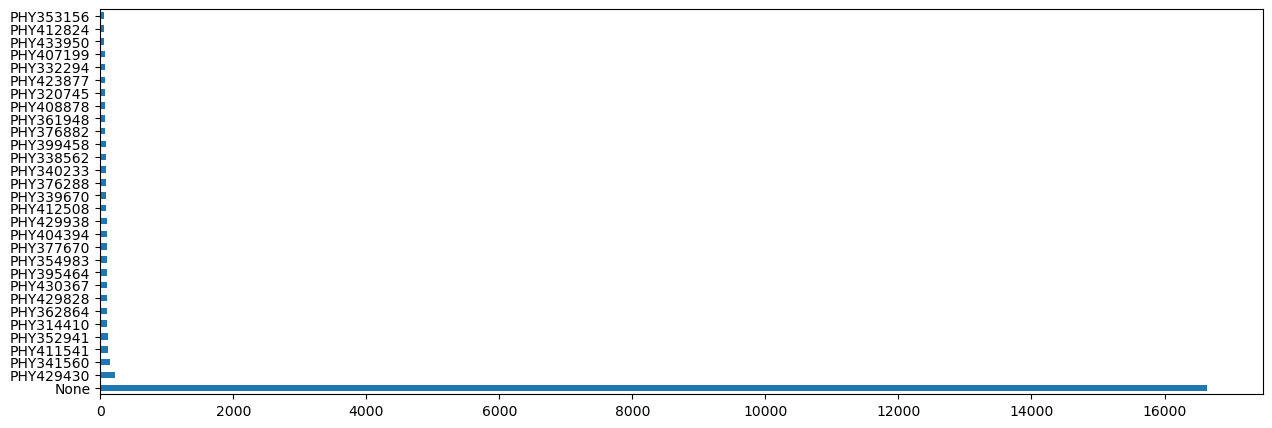

In [115]:
plt.figure(figsize=(15, 5))
df.OperatingPhysician.value_counts().head(30).plot( x=df.OperatingPhysician , kind = 'barh')
plt.show()

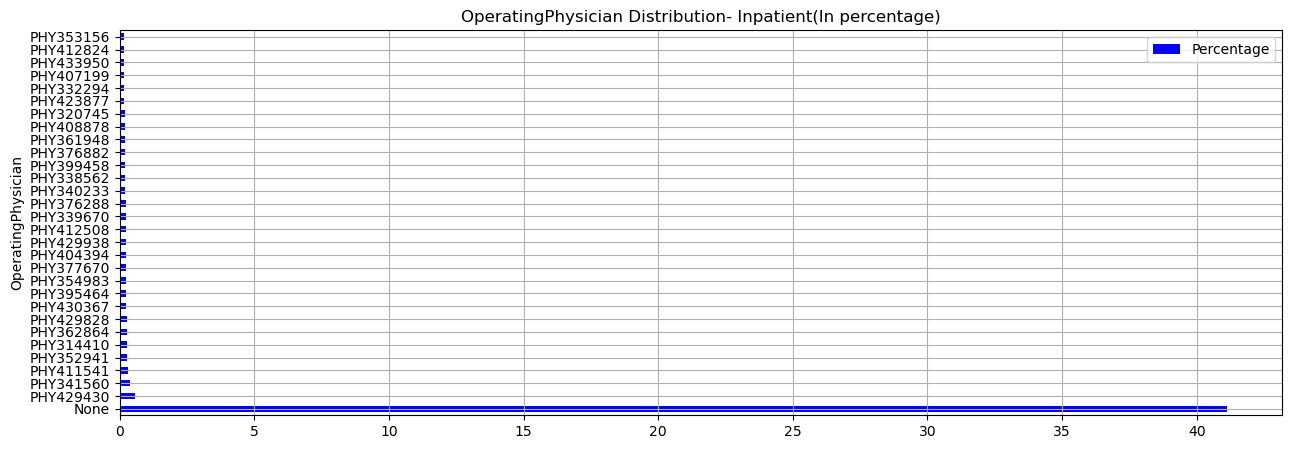

In [118]:
analyse_cat_columns(df,
                    col_to_analyse='OperatingPhysician' , 
                    prefix = '',
                    y_lim = np.arange(0,1,0.1),
                    title = 'OperatingPhysician Distribution- Inpatient(In percentage)',
                    top_val = 30)

* Operating Physician PHY429430 does most of the operations.

c:\Users\jhauj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


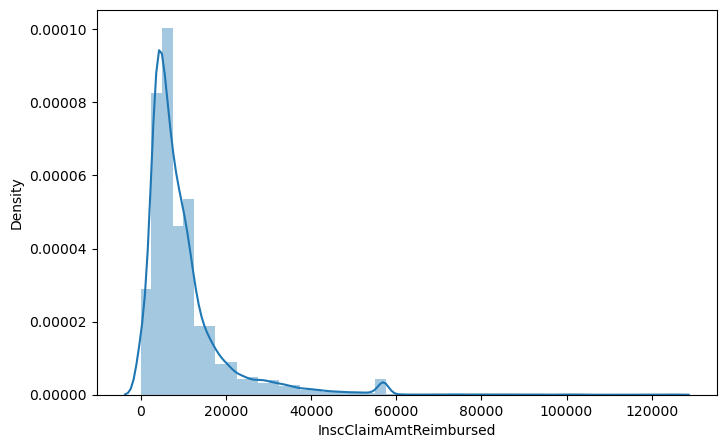

In [120]:
plt.figure(figsize=(8, 5))
sns.distplot(df.InscClaimAmtReimbursed)
plt.show()

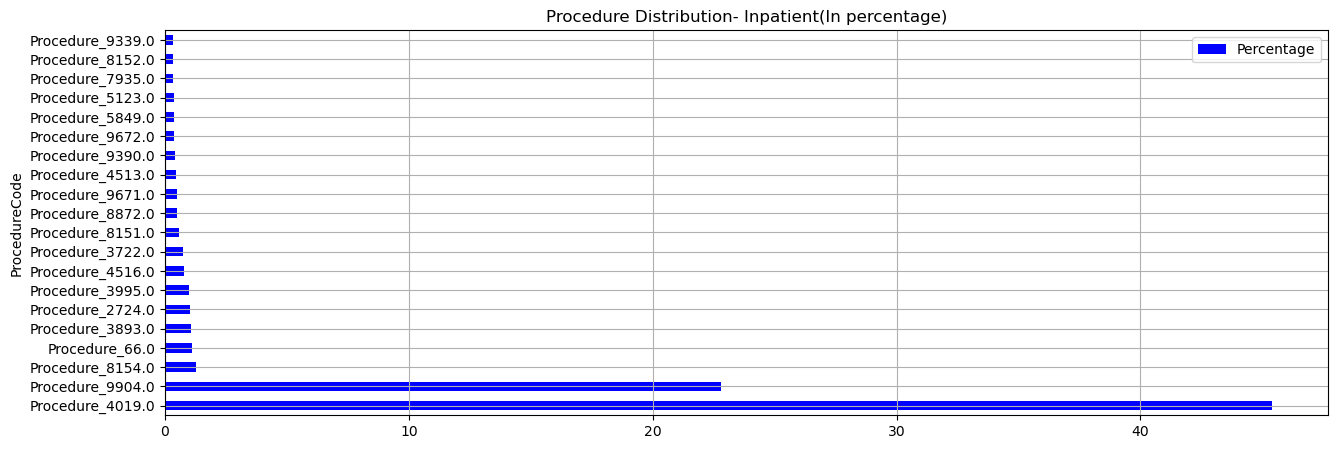

In [121]:
analyse_cat_columns(
    IP_procedure_df,
    col_to_analyse='ProcedureCode' , 
    prefix = 'Procedure_',
    title = 'Procedure Distribution- Inpatient(In percentage)',
    top_val = 20)